In [0]:
######################################
########## DATA PREPARATION ##########
######################################

import numpy as np
import matplotlib.pyplot as plt

"""Script to download the 20 newsgroups text classification set"""
from sklearn.datasets import fetch_20newsgroups

########## TRAIN DATA ##############
# categories = ['alt.atheism' , 'soc.religion.christian' , 'comp.graphics' , 'sci.med'] # to match tutorial
twenty_train = fetch_20newsgroups(subset = 'train', remove=(['headers', 'footers', 'quotes']))
# twenty_train = fetch_20newsgroups(subset = 'train', categories=categories)

########## TEST DATA ##############
twenty_test = fetch_20newsgroups(subset = 'test', remove=(['headers', 'footers', 'quotes']))

"""Define count vectorizer and tf-idf transformations"""

###### Count Vectorizer #######
from sklearn.feature_extraction.text import CountVectorizer
### Filter out these stopwords ####
stopwords = ["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"]
#### Filter: Stopwords, token_pattern filters out the non-letter characters
count_vect = CountVectorizer(analyzer='word', stop_words = stopwords,  token_pattern = r'\b[^\d\W_/]+\b')

########## TFIDF ############
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer(use_idf=True,smooth_idf=True) # turned on idf and smooth idf

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
No handles with labels found to put in legend.


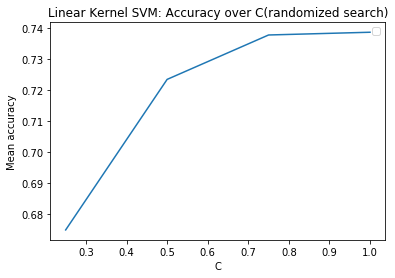

No handles with labels found to put in legend.


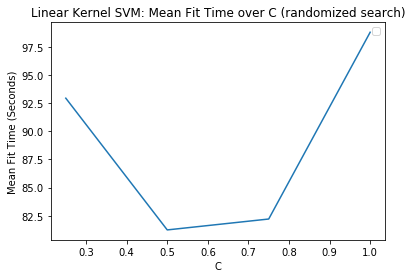

Best CV score (Linear Kernel SVM): 0.7387311663859426
Best estimators (Linear Kernel SVM): {'clf__kernel': 'linear', 'clf__C': 1}
Test accuracy of Random Forest (Linear Kernel SVM) with best params: 0.6830855018587361


In [0]:
#######################################
########## LINEAR KERNEL SVM ##########
#######################################

from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt 
import os

if not os.path.exists('kernel_SVM'):
  os.makedirs('kernel_SVM')

kernel_svm_clf = SVC()

# Test C = 1,2,3,4
kernel_svm_params_lin = {'clf__kernel':['linear'],'clf__C':[1,2,3,4]}

# Test C = 0.25,0.5,0.75,1
#kernel_svm_params_lin = {'clf__kernel':['linear'],'clf__C':[0.25,0.5,0.75,1]}

kernel_svm_pipeline_lin = Pipeline([('vect', count_vect), ('tfidf', tfidf_transformer), ('clf', kernel_svm_clf)])

kernel_svm_CV_lin = RandomizedSearchCV(kernel_svm_pipeline_lin, kernel_svm_params_lin, cv=5, n_jobs=-1) # 5-fold cross-val
kernel_svm_CV_lin.fit(twenty_train.data, twenty_train.target)

plt.plot(list(kernel_svm_CV_lin.cv_results_.get('param_clf__C')), kernel_svm_CV_lin.cv_results_.get('mean_test_score'))

plt.xlabel("C")
plt.ylabel("Mean accuracy")
plt.title("Linear Kernel SVM: Accuracy over C(randomized search)")
plt.legend()
plt.savefig("kernel_SVM/linear_kernel_SVM_accuracy.png")
plt.show()

plt.plot(list(kernel_svm_CV_lin.cv_results_.get('param_clf__C')), kernel_svm_CV_lin.cv_results_.get('mean_fit_time'))

plt.xlabel("C")
plt.ylabel("Mean Fit Time (Seconds)")
plt.title("Linear Kernel SVM: Mean Fit Time over C (randomized search)")
plt.legend()
plt.savefig("kernel_SVM/linear_kernel_SVM_time.png")
plt.show()


print("Best CV score (Linear Kernel SVM): " + str(kernel_svm_CV_lin.best_score_))
print("Best estimators (Linear Kernel SVM): " + str(kernel_svm_CV_lin.best_params_))
print("Test accuracy of Linear Kernel SVM with best params: " + str(kernel_svm_CV_lin.best_estimator_.score(twenty_test.data, twenty_test.target)))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
No handles with labels found to put in legend.


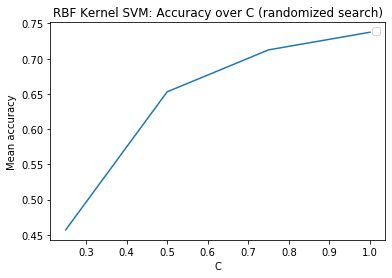

No handles with labels found to put in legend.


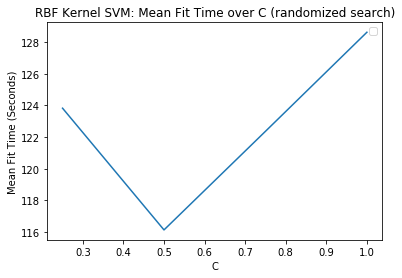

Best CV score (RBF Kernel SVM): 0.7375820145945247
Best estimators (RBF Kernel SVM): {'clf__kernel': 'rbf', 'clf__C': 1}
Test accuracy of Random Forest (RBF Kernel SVM) with best params: 0.6759160913436006


In [0]:
############################
###### RBF Kernel SVM ###### 
############################

from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt 
import os

if not os.path.exists('kernel_SVM'):
  os.makedirs('kernel_SVM')

kernel_svm_clf = SVC()

# Test C = 1,2,3,4
kernel_svm_params = {'clf__kernel':['rbf'],'clf__C':[1,2,3,4]}

# Test C = 0.25,0.5,0.75,1
# kernel_svm_params = {'clf__kernel':['rbf'],'clf__C':[0.25,0.5,0.75,1]}

kernel_svm_pipeline = Pipeline([('vect', count_vect), ('tfidf', tfidf_transformer), ('clf', kernel_svm_clf)])

kernel_svm_CV = RandomizedSearchCV(kernel_svm_pipeline, kernel_svm_params, cv=5, n_jobs=-1) # 5-fold cross-val
kernel_svm_CV.fit(twenty_train.data, twenty_train.target)

plt.plot(list(kernel_svm_CV.cv_results_.get('param_clf__C')), kernel_svm_CV.cv_results_.get('mean_test_score'))

plt.xlabel("C")
plt.ylabel("Mean accuracy")
plt.title("RBF Kernel SVM: Accuracy over C (randomized search)")
plt.legend()
plt.savefig("kernel_SVM/rbf_kernel_SVM_accuracy.png")
plt.show()

plt.plot(list(kernel_svm_CV.cv_results_.get('param_clf__C')), kernel_svm_CV.cv_results_.get('mean_fit_time'))

plt.xlabel("C")
plt.ylabel("Mean Fit Time (Seconds)")
plt.title("RBF Kernel SVM: Mean Fit Time over C (randomized search)")
plt.legend()
plt.savefig("kernel_SVM/rbf_kernel_SVM_time.png")
plt.show()


print("Best CV score (RBF Kernel SVM): " + str(kernel_svm_CV.best_score_))
print("Best estimators (RBF Kernel SVM): " + str(kernel_svm_CV.best_params_))
print("Test accuracy of RBF Kernel SVM with best params: " + str(kernel_svm_CV.best_estimator_.score(twenty_test.data, twenty_test.target)))

In [0]:
############################################
###### 2-Degree Polynomial Kernel SVM ###### 
############################################

from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt 
import os

if not os.path.exists('kernel_SVM'):
  os.makedirs('kernel_SVM')

kernel_svm_clf = SVC()

# Test C = 1,2,3,4 
kernel_svm_params_poly = {'clf__kernel':['poly'],'clf__degree':[2],'clf__C':[1,2,3,4]}

# Test C = 0.25,0.5,0.75,1
# kernel_svm_params_poly = {'clf__kernel':['poly'],'clf__degree':[2],'clf__C':[0.25,0.5,0.75,1]}

kernel_svm_pipeline_poly = Pipeline([('vect', count_vect), ('tfidf', tfidf_transformer), ('clf', kernel_svm_clf)])

kernel_svm_CV_poly = RandomizedSearchCV(kernel_svm_pipeline_poly, kernel_svm_params_poly, cv=5, n_jobs=-1) # 5-fold cross-val
kernel_svm_CV_poly.fit(twenty_train.data, twenty_train.target)

plt.plot(list(kernel_svm_CV_poly.cv_results_.get('param_clf__C')), kernel_svm_CV_poly.cv_results_.get('mean_test_score'))

plt.xlabel("C")
plt.ylabel("Mean accuracy")
plt.title("2-Degree Polynomial Kernel SVM: Accuracy over C (randomized search)")
plt.legend()
plt.savefig("kernel_SVM/2_poly_kernel_SVM_accuracy.png")
plt.show()

plt.plot(list(kernel_svm_CV_poly.cv_results_.get('param_clf__C')), kernel_svm_CV_poly.cv_results_.get('mean_fit_time'))

plt.xlabel("C")
plt.ylabel("Mean Fit Time (Seconds)")
plt.title("2-Degree Polynomial Kernel SVM: Mean Fit Time over C (randomized search)")
plt.legend()
plt.savefig("kernel_SVM/2_poly_kernel_SVM_time.png")
plt.show()


print("Best CV score (2-Degree Polynomial Kernel SVM): " + str(kernel_svm_CV_poly.best_score_))
print("Best estimators (2-Degree Polynomial Kernel SVM): " + str(kernel_svm_CV_poly.best_params_))
print("Test accuracy of 2-Degree Polynomial Kernel SVM with best params: " + str(kernel_svm_CV_poly.best_estimator_.score(twenty_test.data, twenty_test.target)))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
No handles with labels found to put in legend.


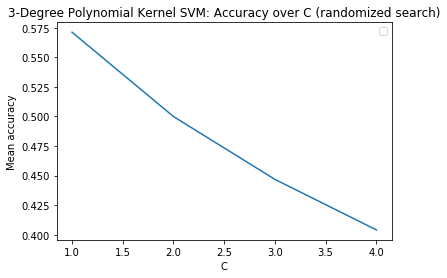

No handles with labels found to put in legend.


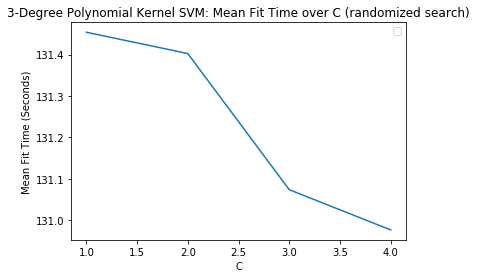

Best CV score (3-Degree Polynomial Kernel SVM): 0.5711494213802715
Best estimators (3-Degree Polynomial Kernel SVM): {'clf__kernel': 'poly', 'clf__degree': 3, 'clf__C': 1}
Test accuracy of Random Forest (3-Degree Polynomial Kernel SVM) with best params: 0.48154540626659587


In [0]:
############################################
###### 3-Degree Polynomial Kernel SVM ###### 
############################################

from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt 
import os

if not os.path.exists('kernel_SVM'):
  os.makedirs('kernel_SVM')

kernel_svm_clf = SVC()

# Test C = 1,2,3,4
kernel_svm_params_poly_3 = {'clf__kernel':['poly'],'clf__degree':[3],'clf__C':[1,2,3,4]}

# Test C = 0.25,0.5,0.75,1
# kernel_svm_params_poly_3 = {'clf__kernel':['poly'],'clf__degree':[3],'clf__C':[0.25,0.5,0.75,1]}

kernel_svm_pipeline_poly_3 = Pipeline([('vect', count_vect), ('tfidf', tfidf_transformer), ('clf', kernel_svm_clf)])

kernel_svm_CV_poly_3 = RandomizedSearchCV(kernel_svm_pipeline_poly_3, kernel_svm_params_poly_3, cv=5, n_jobs=-1) # 5-fold cross-val
kernel_svm_CV_poly_3.fit(twenty_train.data, twenty_train.target)

plt.plot(list(kernel_svm_CV_poly_3.cv_results_.get('param_clf__C')), kernel_svm_CV_poly_3.cv_results_.get('mean_test_score'))

plt.xlabel("C")
plt.ylabel("Mean accuracy")
plt.title("3-Degree Polynomial Kernel SVM: Accuracy over C (randomized search)")
plt.legend()
plt.savefig("kernel_SVM/3_poly_kernel_SVM_accuracy.png")
plt.show()

plt.plot(list(kernel_svm_CV_poly_3.cv_results_.get('param_clf__C')), kernel_svm_CV_poly_3.cv_results_.get('mean_fit_time'))

plt.xlabel("C")
plt.ylabel("Mean Fit Time (Seconds)")
plt.title("3-Degree Polynomial Kernel SVM: Mean Fit Time over C (randomized search)")
plt.legend()
plt.savefig("kernel_SVM/3_poly_kernel_SVM_time.png")
plt.show()


print("Best CV score (3-Degree Polynomial Kernel SVM): " + str(kernel_svm_CV_poly_3.best_score_))
print("Best estimators (3-Degree Polynomial Kernel SVM): " + str(kernel_svm_CV_poly_3.best_params_))
print("Test accuracy of 3-Degree Polynomial Kernel SVM with best params: " + str(kernel_svm_CV_poly_3.best_estimator_.score(twenty_test.data, twenty_test.target)))

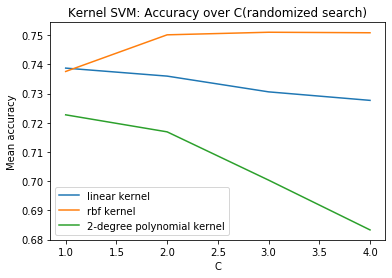

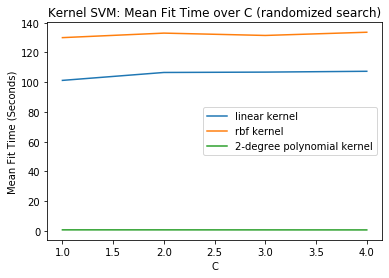

In [0]:
################################################
###### Kernel SVM: model comparison graph ###### 
################################################

plt.plot(list(kernel_svm_CV_lin.cv_results_.get('param_clf__C')), kernel_svm_CV_lin.cv_results_.get('mean_test_score'), label = 'linear kernel')
plt.plot(list(kernel_svm_CV.cv_results_.get('param_clf__C')), kernel_svm_CV.cv_results_.get('mean_test_score'), label = 'rbf kernel')
plt.plot(list(kernel_svm_CV_poly.cv_results_.get('param_clf__C')), kernel_svm_CV_poly.cv_results_.get('mean_test_score'), label = '2-degree polynomial kernel')

plt.xlabel("C")
plt.ylabel("Mean accuracy")
plt.title("Kernel SVM: Accuracy over C(randomized search)")
plt.legend()
plt.savefig("kernel_SVM/kernel_SVM_accuracy.png")
plt.show()

plt.plot(list(kernel_svm_CV_lin.cv_results_.get('param_clf__C')), kernel_svm_CV_lin.cv_results_.get('mean_fit_time'), label = 'linear kernel')
plt.plot(list(kernel_svm_CV.cv_results_.get('param_clf__C')), kernel_svm_CV.cv_results_.get('mean_fit_time'), label = 'rbf kernel')
plt.plot(list(kernel_svm_CV_poly.cv_results_.get('param_clf__C')), kernel_svm_CV_poly.cv_results_.get('mean_test_score'), label = '2-degree polynomial kernel')

plt.xlabel("C")
plt.ylabel("Mean Fit Time (Seconds)")
plt.title("Kernel SVM: Mean Fit Time over C (randomized search)")
plt.legend()
plt.savefig("kernel_SVM/kernel_SVM_time.png")
plt.show()